In [2]:
pip install prophet

In [3]:
# Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from prophet import Prophet

In [4]:
# Python
df = pd.read_csv('invoices_im.csv')
df.head()

,_id,LC_currency.Symbol,LC_currency.Code,LC_currency._id,FC_currency.Symbol,FC_currency.Code,FC_currency._id,trackingStatus.received.comment,trackingStatus.received.date,trackingStatus.received.status,trackingStatus.initialReview.comment,trackingStatus.initialReview.status,trackingStatus.initialReview.date,trackingStatus.underReview.comment,trackingStatus.underReview.date,trackingStatus.underReview.status,trackingStatus.underApprove.comment,trackingStatus.underApprove.date,trackingStatus.underApprove.status,trackingStatus.paymentInProcess.comment,trackingStatus.paymentInProcess.date,trackingStatus.paymentInProcess.status,trackingStatus.paymentInProcess.updatedBy,trackingStatus.paid.comment,trackingStatus.paid.date,trackingStatus.paid.status,trackingStatus.current_status,isAR,initWorkFlow,workFlowStatus,discountPercent,discountAmt,discountAmt_bc,taxAmt,taxAmt_bc,isPo,isReceipt,isPettyCash,isPrePayment,isExpense,...,accessGroup,accessUser,invoiceTag,items,accessDept,accessComp,accessOrg,attachments,tenantId,vendorId,vendorName,vendorSite,invoiceId,invoiceDate,invoiceHash,dueDate,grossAmt,grossAmt_bc,netAmt,netAmt_bc,po,paymentTerms,organizationId,organizationName,createdBy,createdDate,createdByVendor,expenseType,conversionRate,requesterId,description,invoicePath,version,__v,reviewStatus,reviewed,workflowId,approveStatus,approved,scheduledAmount
0,61278a6db52ecd84cfde68c7,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:34:53.000Z,completed,Invoice Acknowledged & Received.,completed,2021-08-26T12:34:54.000Z,reviewed,2021-08-26T12:38:14.000Z,completed,approved,2021-08-26T12:38:57.000Z,completed,Invoice move to finance and payment in process,2021-08-26T12:48:53.000Z,readyToPay,salic-requester@mailinator.com,Invoice is partially paid,2021-08-31T12:39:31.000Z,partial,paymentInProcess,False,True,completed,0,0,0,0.0,0.0,True,False,False,True,False,...,[],[],"[{""tag"":[""SALIC VENDOR"",10,""2021-08-26"",""INV-3...","[{""discount"":""0"",""discount_bc"":""0"",""amount"":""1...",[],[],[],[],927e3c5a-8ac5-4716-957c-25ee9bb39d54,603f8435f2b9dac1b8d7888d,SALIC VENDOR,"Jeddah, Saudi Arabia",INV-3466,2021-02-26,017e01634f80b518953858ab578f7e403527c2bb3ce6ee...,2021-11-04,10.0,10.0,10.0,10.0,104,15,602241c47a18fc82a41cd973,SALIC,salic-requester@mailinator.com,2021-02-26T12:34:53.000Z,False,false,true,salic-requester@mailinator.com,false,Tenants//927e3c5a-8ac5-4716-957c-25ee9bb39d54/...,1,0,reviewed,2021-08-26T12:38:14.000Z,60ed3fc2360fcb05fcfd294b,approved,2021-08-26T12:38:57.000Z,7.0
1,61278a89b52ecd1e55de68d0,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:35:21.000Z,completed,Invoice Acknowledged & Received.,completed,2021-08-26T12:35:22.000Z,reviewed,2021-08-26T12:38:20.000Z,completed,approved,2021-08-26T12:39:06.000Z,completed,Invoice move to finance and payment in process,2021-08-26T12:40:19.000Z,readyToPay,salic-requester@mailinator.com,false,2021-08-26T12:40:19.000Z,inProgress,paymentInProcess,False,True,completed,0,0,0,0.0,0.0,True,False,True,True,True,...,[],[],"[{""tag"":[""SALIC VENDOR"",250,""2021-08-26"",""INV-...","[{""discount"":""0"",""discount_bc"":""0"",""amount"":""2...",[],[],[],[],927e3c5a-8ac5-4716-957c-25ee9bb39d54,603f8435f2b9dac1b8d7888d,SALIC VENDOR,"Jeddah, Saudi Arabia",INV-3467,2021-03-26,7cd40d59ed29f88a0e27a8888738ad09a7e27dd397c7d4...,2021-09-12,250.0,250.0,250.0,250.0,106,15,602241c47a18fc82a41cd973,SALIC,salic-requester@mailinator.com,2021-03-26T12:35:21.000Z,False,NaN,true,salic-requester@mailinator.com,false,Tenants//927e3c5a-8ac5-4716-957c-25ee9bb39d54/...,1,0,reviewed,2021-08-26T12:38:19.000Z,60ed3fc2360fcb05fcfd294b,approved,2021-08-26T12:39:06.000Z,NaN
2,61278ab0b52ecdb885de68ef,$,USD,607e9226ab2ec8820dad0226,$,USD,607e9226ab2ec8820dad0226,Invoice Created,2021-08-26T12:36:00.000Z,completed,Invoice Acknowledged & Received.,completed,2021-08-26T12:36:01.000Z,reviewed,2021-08-26T12:38:25.000Z,completed,ok,2021-08-26T12:3

In [5]:
df.columns

Index(['_id', 'LC_currency.Symbol', 'LC_currency.Code', 'LC_currency._id',
       'FC_currency.Symbol', 'FC_currency.Code', 'FC_currency._id',
       'trackingStatus.received.comment', 'trackingStatus.received.date',
       'trackingStatus.received.status',
       'trackingStatus.initialReview.comment',
       'trackingStatus.initialReview.status',
       'trackingStatus.initialReview.date',
       'trackingStatus.underReview.comment', 'trackingStatus.underReview.date',
       'trackingStatus.underReview.status',
       'trackingStatus.underApprove.comment',
       'trackingStatus.underApprove.date',
       'trackingStatus.underApprove.status',
       'trackingStatus.paymentInProcess.comment',
       'trackingStatus.paymentInProcess.date',
       'trackingStatus.paymentInProcess.status',
       'trackingStatus.paymentInProcess.updatedBy',
       'trackingStatus.paid.comment', 'trackingStatus.paid.date',
       'trackingStatus.paid.status', 'trackingStatus.current_status', 'isAR',
     

In [6]:
df = df.filter(['vendorName','createdDate','netAmt'])
df

,vendorName,createdDate,netAmt
0,SALIC VENDOR,2021-02-26T12:34:53.000Z,10.00
1,SALIC VENDOR,2021-03-26T12:35:21.000Z,250.00
2,SALIC VENDOR,2021-08-26T12:36:00.000Z,400.00
3,SALIC VENDOR,2021-08-26T12:36:32.000Z,200.00
4,SALIC VENDOR,2021-05-26T12:36:56.000Z,100.00
5,SALIC VENDOR,2021-08-31T09:38:39.000Z,200.00
6,SALIC VENDOR,2021-08-31T11:42:55.000Z,300.00
7,SALIC VENDOR,2021-09-01T08:19:42.000Z,3663.00
8,Ahsan Zulfiqar,2021-09-10T11:03:53.000Z,8500.00
9,Ahsan Zulfiqar,2021-09-10T11:04:31.000Z,8500.00


In [7]:
df = df[df["vendorName"] == "SALIC VENDOR"]
df = df.iloc[: , 1:]
print(df)

                 createdDate     netAmt
0   2021-02-26T12:34:53.000Z      10.00
1   2021-03-26T12:35:21.000Z     250.00
2   2021-08-26T12:36:00.000Z     400.00
3   2021-08-26T12:36:32.000Z     200.00
4   2021-05-26T12:36:56.000Z     100.00
5   2021-08-31T09:38:39.000Z     200.00
6   2021-08-31T11:42:55.000Z     300.00
7   2021-09-01T08:19:42.000Z    3663.00
13  2021-09-20T08:01:00.000Z  262500.00
14  2021-09-20T08:12:52.000Z     275.00
15  2021-09-21T13:01:38.000Z      10.00
17  2021-10-04T09:58:18.000Z     100.00
18  2021-10-04T10:17:07.000Z      34.20
20  2021-10-04T14:07:18.000Z     275.00
21  2021-10-04T14:24:16.000Z     275.00
22  2021-10-04T14:26:53.000Z     275.00
23  2021-10-04T14:29:41.000Z     275.00
24  2021-10-14T12:11:01.000Z     100.00
25  2021-10-27T10:59:02.000Z    8712.00
26  2021-10-27T11:17:54.000Z     100.00
27  2021-11-05T06:26:43.000Z  250000.00
28  2021-11-06T18:45:29.000Z    6180.48
29  2021-11-09T08:05:55.000Z      26.25
30  2021-11-10T09:24:51.000Z  250000.00


In [8]:
df.rename(columns={'createdDate': 'ds', 'netAmt': 'y'}, inplace=True)

In [9]:
date = []
for i in df["ds"]:
  i = i[:10]
  date.append(i)
df["ds"] = date
df['ds']= pd.to_datetime(df['ds'])
df

,ds,y
0,2021-02-26,10.00
1,2021-03-26,250.00
2,2021-08-26,400.00
3,2021-08-26,200.00
4,2021-05-26,100.00
5,2021-08-31,200.00
6,2021-08-31,300.00
7,2021-09-01,3663.00
13,2021-09-20,262500.00
14,2021-09-20,275.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      25 non-null     datetime64[ns]
 1   y       25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 600.0 bytes


In [11]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


In [16]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
376,2022-11-11
377,2022-11-12
378,2022-11-13
379,2022-11-14
380,2022-11-15


In [17]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
376,2022-11-11,485978.457288,402568.468543,574638.142821
377,2022-11-12,288109.448985,207912.230276,372992.389735
378,2022-11-13,565145.741537,482481.510508,657496.708498
379,2022-11-14,336738.780955,248368.934404,419267.473747
380,2022-11-15,317905.209833,231326.912192,406278.210818


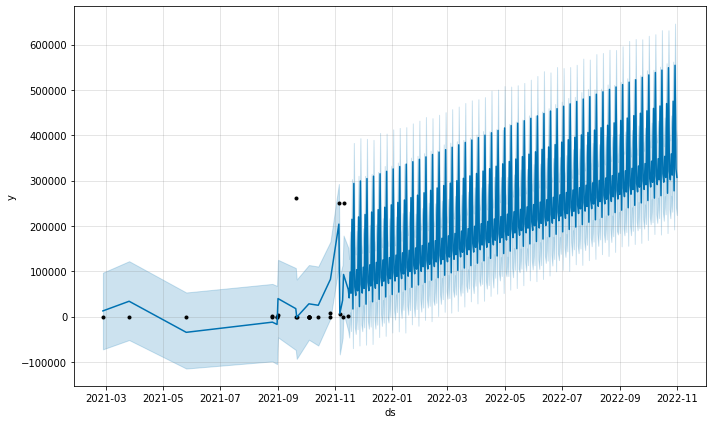

In [18]:
# Python
fig1 = m.plot(forecast[:-14])

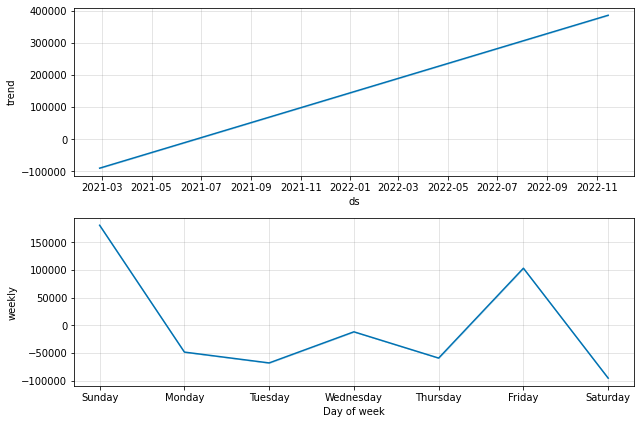

In [19]:
# Python
fig2 = m.plot_components(forecast)